# build a hello world program using a 2-qubit Bell state


 Step 1: Map the problem to circuits and operators 

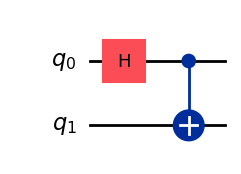

In [2]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)  #2-qubit system

qc.h(0)     #Hadmard gate --> produces an equal superposition state
qc.cx(0,1)      #CNOT gate with first argument as control qubit and second as target 

qc.draw(output='mpl')   #mpl - MatPlotLib

In [3]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

observables = [ZZ, ZI, IZ, XX, XI, IX]


Step 2: Optimize 

Step 3: Exceute on the backend 

In [4]:
from qiskit_aer.primitives import Estimator

estimator = Estimator()


#first argument ensures that the number is same for all qubits 
job = estimator.run([qc]*len(observables), observables)

job.result()

EstimatorResult(values=array([ 1.        ,  0.08398438,  0.08398438,  1.        , -0.01367188,
       -0.01367188]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0111335, 'sample_measure_time': 0.0038981, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 7530, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 12, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9929466247558594, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0111335, 'sample_measure_time': 0.00389

Step 4: Post Processing and plotting

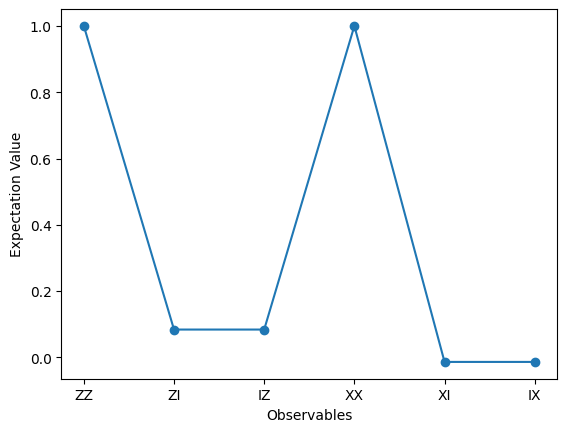

In [5]:
import matplotlib.pyplot as plt 

data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
values = job.result().values

plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectation Value')

plt.show()